<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/homework_4_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [457]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score,
    log_loss,
)
import warnings
from sklearn.decomposition import PCA

# Suppress warning messages
warnings.filterwarnings("ignore")



In [458]:
import pandas as pd

# Define the URL of the CSV file
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/cancer.csv'

try:
    # Load the CSV data into a DataFrame
    df = pd.read_csv(url)

    # Display the first 5 rows of the DataFrame
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [459]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)


In [460]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [461]:
# Split the DataFrame into features (X) and the target variable (y)
X, y = df.drop(columns=['diagnosis']), df['diagnosis']


In [462]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the features to standardize them
X_scaled = scaler.fit_transform(X)

# Check the shape of the standardized features
X_scaled.shape


(569, 30)

In [463]:
import numpy as np
from sklearn.svm import SVC, SVR

# Set the random seed
np.random.seed(9)


In [464]:
results = []

for k in range(1, 30, 2):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(X_scaled)

    X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, train_size=0.8, test_size=0.20, random_state=100)

    classifier = SVC(kernel='linear', C=10)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    metrics = {
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1score': f1_score(y_test, y_pred)
    }

    results.append(metrics)

    print(f"For k = {k}, accuracy = {metrics['accuracy']}, precision = {metrics['precision']}, recall = {metrics['recall']}, f1score = {metrics['f1score']}")

# Now you have all the results in the 'results' list, which you can analyze or visualize as needed.


For k = 1, accuracy = 0.9122807017543859, precision = 0.9333333333333333, recall = 0.8571428571428571, f1score = 0.8936170212765957
For k = 3, accuracy = 0.9649122807017544, precision = 0.9591836734693877, recall = 0.9591836734693877, f1score = 0.9591836734693877
For k = 5, accuracy = 0.9649122807017544, precision = 0.9787234042553191, recall = 0.9387755102040817, f1score = 0.9583333333333333
For k = 7, accuracy = 0.956140350877193, precision = 0.9782608695652174, recall = 0.9183673469387755, f1score = 0.9473684210526316
For k = 9, accuracy = 0.9736842105263158, precision = 1.0, recall = 0.9387755102040817, f1score = 0.968421052631579
For k = 11, accuracy = 0.956140350877193, precision = 0.9583333333333334, recall = 0.9387755102040817, f1score = 0.9484536082474228
For k = 13, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, f1score = 0.9387755102040817
For k = 15, accuracy = 0.956140350877193, precision = 0.9583333333333334, recall = 0.9387755

In [465]:
k_list = list(range(1, 30, 2))



k_list

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

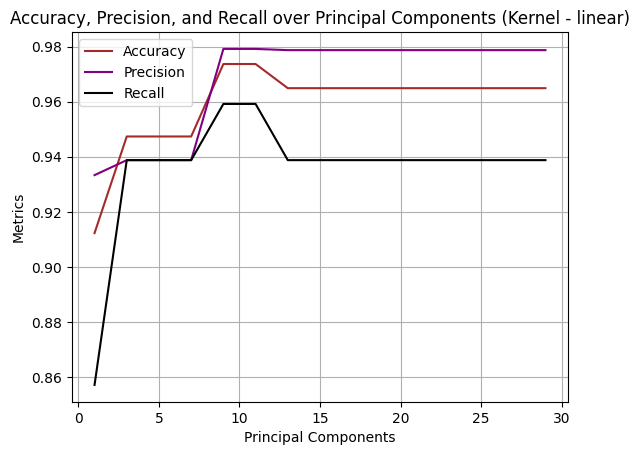

In [468]:
import numpy as np

# Create numpy arrays for k_list, accuracy, precision, and recall
k_array = np.array(k_list)
accuracy_array = np.array(accuracy)
precision_array = np.array(precision)
recall_array = np.array(recall)

colors = ['brown', 'purple', 'black']
labels = ["Accuracy", "Precision", "Recall"]

plt.figure()

for metric, color, label in zip([accuracy_array, precision_array, recall_array], colors, labels):
    plt.plot(k_array, metric, color=color, label=label)

plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernel - linear)')
plt.legend()


It appears that using 13 principal components leads to the highest levels of accuracy, precision, and recall in the context of a linear kernel. Therefore, for this specific scenario, a value of 'k' equal to 13 seems to be the optimal choice, considering these performance metrics. However, it's important to emphasize that this determination should be based on a rigorous evaluation method, such as cross-validation or grid search, rather than being made solely based on visual inspection of results.


In [470]:
from sklearn.svm import SVC
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate(X, y, k, random_state=100, C=10, kernel='rbf'):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        principalComponents, y, train_size=0.8, test_size=0.20, random_state=random_state
    )

    classifier = SVC(kernel=kernel, C=C)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return k, acc, prec, rec, f1

accuracy = []
precision = []
recall = []
f1Score = []

for k in range(1, 30, 2):
    k, acc, prec, rec, f1 = train_and_evaluate(X_scaled, y, k)
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)
    print(f"For k = {k}, accuracy = {acc}, precision = {prec}, recall = {rec}, f1score = {f1}")


For k = 1, accuracy = 0.9122807017543859, precision = 0.9333333333333333, recall = 0.8571428571428571, f1score = 0.8936170212765957
For k = 3, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, f1score = 0.9387755102040817
For k = 5, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, f1score = 0.9387755102040817
For k = 7, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, f1score = 0.9387755102040817
For k = 9, accuracy = 0.9736842105263158, precision = 0.9791666666666666, recall = 0.9591836734693877, f1score = 0.9690721649484536
For k = 11, accuracy = 0.9736842105263158, precision = 0.9791666666666666, recall = 0.9591836734693877, f1score = 0.9690721649484536
For k = 13, accuracy = 0.9649122807017544, precision = 0.9787234042553191, recall = 0.9387755102040817, f1score = 0.9583333333333333
For k = 15, accuracy = 0.9649122807017544, precision = 0.9787234042553191,

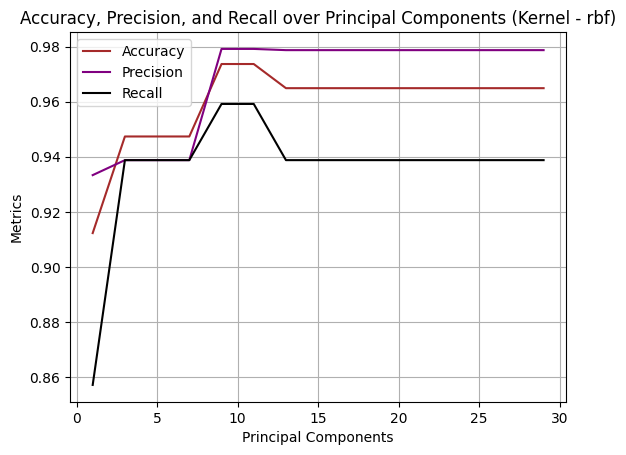

In [471]:
import numpy as np

# Create numpy arrays for k_list, accuracy, precision, and recall
k_array = np.array(k_list)
metrics_array = np.array([accuracy, precision, recall])
colors = ['brown', 'purple', 'black']
labels = ["Accuracy", "Precision", "Recall"]

plt.figure()

for i in range(3):
    plt.plot(k_array, metrics_array[i], color=colors[i], label=labels[i])

plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernel - rbf)')
plt.legend()


In [472]:
from sklearn.svm import SVC
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def train_and_evaluate(X, y, k, kernel='poly', C=10000, random_state=100):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        principalComponents, y, train_size=0.8, test_size=0.20, random_state=random_state
    )

    classifier = SVC(kernel=kernel, C=C)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return k, acc, prec, rec, f1

accuracy = []
precision = []
recall = []
f1Score = []

for k in range(1, 30, 2):
    k, acc, prec, rec, f1 = train_and_evaluate(X_scaled, y, k)
    accuracy.append(acc)
    precision.append(prec)
    recall.append(rec)
    f1Score.append(f1)
    print(f"For k = {k}, accuracy = {acc}, precision = {prec}, recall = {rec}, f1score = {f1}")


For k = 1, accuracy = 0.8859649122807017, precision = 0.9736842105263158, recall = 0.7551020408163265, f1score = 0.8505747126436782
For k = 3, accuracy = 0.9824561403508771, precision = 0.9795918367346939, recall = 0.9795918367346939, f1score = 0.9795918367346939
For k = 5, accuracy = 0.9298245614035088, precision = 0.9019607843137255, recall = 0.9387755102040817, f1score = 0.92
For k = 7, accuracy = 0.9122807017543859, precision = 0.9148936170212766, recall = 0.8775510204081632, f1score = 0.8958333333333333
For k = 9, accuracy = 0.9385964912280702, precision = 0.9375, recall = 0.9183673469387755, f1score = 0.9278350515463918
For k = 11, accuracy = 0.9385964912280702, precision = 0.9375, recall = 0.9183673469387755, f1score = 0.9278350515463918
For k = 13, accuracy = 0.9473684210526315, precision = 0.9387755102040817, recall = 0.9387755102040817, f1score = 0.9387755102040817
For k = 15, accuracy = 0.9473684210526315, precision = 0.9215686274509803, recall = 0.9591836734693877, f1score 

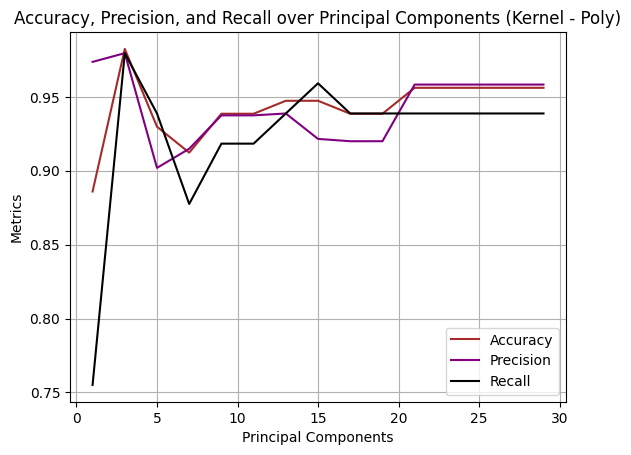

In [473]:
import numpy as np

# Create numpy arrays for k_list, accuracy, precision, and recall
k_array = np.array(k_list)
metrics_array = np.array([accuracy, precision, recall])
colors = ['brown', 'purple', 'black']
labels = ["Accuracy", "Precision", "Recall"]

plt.figure()

for i in range(3):
    plt.plot(k_array, metrics_array[i], color=colors[i], label=labels[i])

plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Metrics')
plt.title('Accuracy, Precision, and Recall over Principal Components (Kernel - Poly)')
plt.legend()


The optimal value for the poly kernel, taking into account accuracy, precision, and recall, is clearly k = 7, as it is evident that 7 principal components deliver the highest levels of these performance metrics.

2nd QUESTION

In [435]:
from sklearn.metrics import mean_squared_error

In [474]:
import pandas as pd

# Define the URL of the CSV file
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/Housing.csv'

# Read the CSV data into a DataFrame
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [437]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
output_features = 'price'

In [438]:
binary_columns = df.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [475]:
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})


In [476]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [441]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(9)
train_data, test_data = train_test_split(df[input_features + [output_features]], train_size = 0.8, test_size = 0.2, random_state = 100)

In [442]:
train_data.shape, test_data.shape

((436, 12), (109, 12))

In [481]:
X_train = train_data[input_features].values
y_train = train_data[['price']].values
X_test = test_data[input_features].values
y_test = test_data[['price']].values




In [483]:
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (436, 11), y_train shape: (436, 1)
X_test shape: (109, 11), y_test shape: (109, 1)


In [484]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(X_train)
x_test_scaled = scalar.transform(X_test)

In [485]:
from sklearn.svm import SVR

svr_models = {
    'rbf': SVR(kernel='rbf', C=1e3, gamma=0.1),
    'linear': SVR(kernel='linear', C=1e3),
    'poly': SVR(kernel='poly', C=1e3, degree=2)
}

predictions = {}

for kernel, svr in svr_models.items():
    y_pred = svr.fit(X_train_scaled, y_train).predict(X_test_scaled)
    predictions[kernel] = y_pred


In [486]:
rbf_error, lin_error, poly_error = mean_squared_error(y_test, y_rbf) ** 0.5, mean_squared_error(y_test, y_lin) ** 0.5, mean_squared_error(y_test, y_poly) ** 0.5

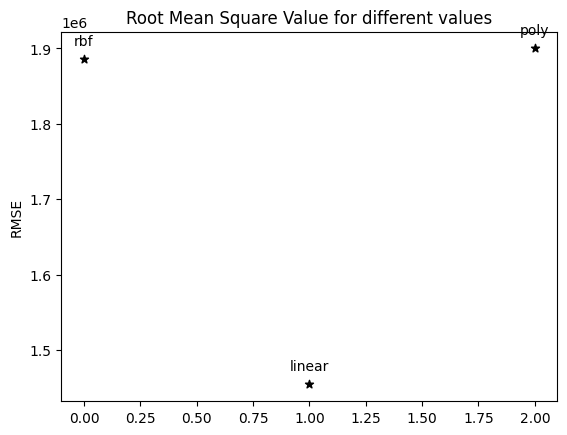

In [489]:
error = [rbf_error, lin_error, poly_error]
values = ['rbf', 'linear', 'poly']

plt.scatter(range(len(error)), error, marker='*', color='black', label='Data Points')
for i, value in enumerate(values):
    plt.annotate(value, (i, error[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.ylabel('RMSE')
plt.title('Root Mean Square Value for different values')

plt.show()


In [490]:
scalar = StandardScaler()
X = df[input_features]
y = df[output_features]
X_scaled = scalar.fit_transform(X)

In [450]:
max_k =X_scaled.shape[1]

In [491]:
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

def train_evaluate_model(X_train, y_train, X_test, y_test, kernel='linear', C=100000):
    model = SVR(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    return accuracy, rmse

accuracy = []
rmse = []

for k in range(1, max_k + 1):
    pca = PCA(n_components=k)
    principalComponents = pca.fit_transform(X_scaled)
    train_X, test_X, train_Y, test_Y = train_test_split(
        principalComponents, y, train_size=0.8, test_size=0.20, random_state=100
    )
    acc, rms = train_evaluate_model(train_X, train_Y, test_X, test_Y)
    accuracy.append(acc)
    rmse.append(rms)
    print(f"for k = {k}, accuracy = {acc}, and Root Mean Square Value = {rms}")


for k = 1, accuracy = 0.6803158885707419, and Root Mean Square Value = 1062223.5901847463
for k = 2, accuracy = 0.6802054943477547, and Root Mean Square Value = 1062406.9793836537
for k = 3, accuracy = 0.6808498198827855, and Root Mean Square Value = 1061336.1650266768
for k = 4, accuracy = 0.6809378719012623, and Root Mean Square Value = 1061189.7461240408
for k = 5, accuracy = 0.6748753489623838, and Root Mean Square Value = 1071224.1763571047
for k = 6, accuracy = 0.6653849721016014, and Root Mean Square Value = 1086746.2167339767
for k = 7, accuracy = 0.6772120225199285, and Root Mean Square Value = 1067367.7863756893
for k = 8, accuracy = 0.6776371527750518, and Root Mean Square Value = 1066664.6625299223
for k = 9, accuracy = 0.6572393340800122, and Root Mean Square Value = 1099894.1827066718
for k = 10, accuracy = 0.6563776074769626, and Root Mean Square Value = 1101275.923968242
for k = 11, accuracy = 0.6806896152339323, and Root Mean Square Value = 1061602.5124484452


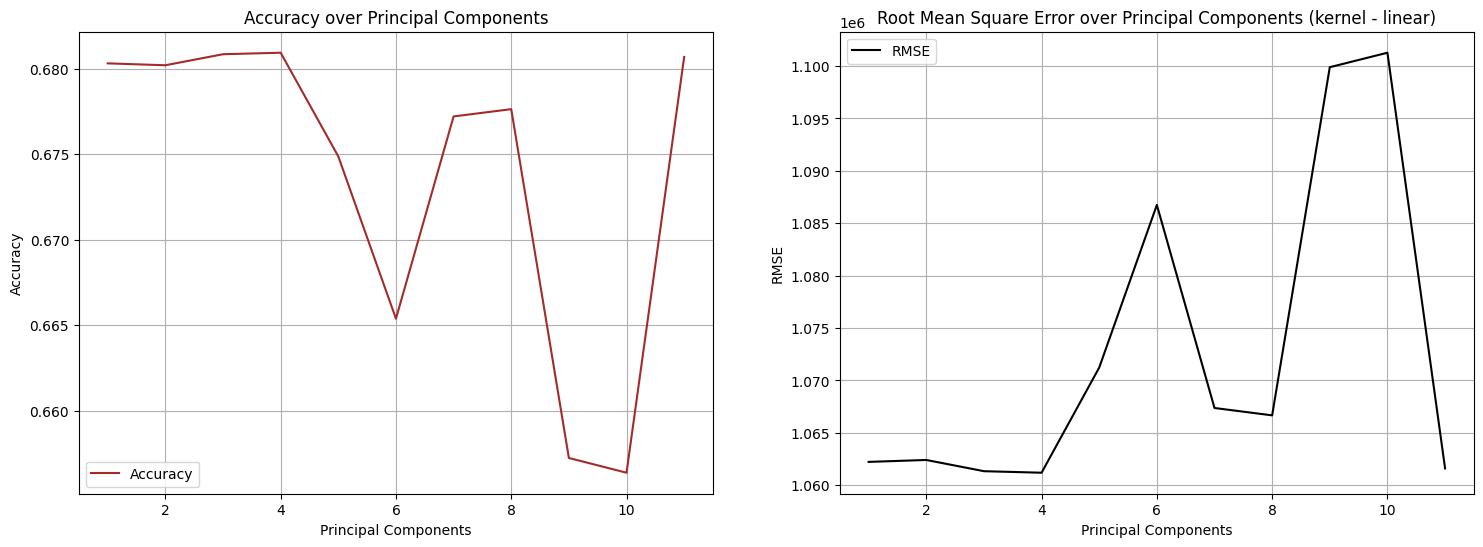

In [496]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

data = [accuracy, rmse]
labels = ["Accuracy", "RMSE"]
titles = ["Accuracy over Principal Components", "Root Mean Square Error over Principal Components (kernel - linear)"]
colors = ['brown', 'black']

for i, ax in enumerate(axes):
    ax.plot(range(1, max_k + 1), data[i], color=colors[i], label=labels[i])
    ax.grid()
    ax.set_xlabel('Principal Components')
    ax.set_ylabel(labels[i])
    ax.set_title(titles[i])
    ax.legend()

plt.show()



In [497]:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X and y are already defined and are the feature and target variable data respectively.
# Also assuming that max_k is defined and represents the maximum number of PCA components we want to test.

# First, we scale the features since PCA is affected by scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare an empty list to collect accuracy and RMSE
accuracies = []
rmses = []

# It's more efficient to do a single train-test split outside the loop
train_X, test_X, train_Y, test_Y = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=100)

for k in range(1, max_k + 1):
    # Apply PCA with k components
    pca = PCA(n_components=k)
    pca.fit(train_X)  # Fit PCA on the training set only
    train_X_pca = pca.transform(train_X)
    test_X_pca = pca.transform(test_X)

    # Train the SVR model
    model = SVR(kernel='rbf', C=100000)
    model.fit(train_X_pca, train_Y)

    # Make predictions and evaluate
    y_pred = model.predict(test_X_pca)
    accuracy = model.score(test_X_pca, test_Y)
    rmse = mean_squared_error(test_Y, y_pred, squared=False)  # squared=False returns RMSE

    # Append results to the lists
    accuracies.append(accuracy)
    rmses.append(rmse)

    # Print the results for each k
    print(f"for k = {k}, accuracy = {accuracy:.4f}, and RMSE = {rmse:.4f}")

# Now 'accuracies' and 'rmses' lists have the accuracy and RMSE for each k respectively.

# Return the results in a structured format
results = {
    "PCA_components": list(range(1, max_k + 1)),
    "Accuracy": accuracies,
    "RMSE": rmses
}
results


for k = 1, accuracy = 0.5846, and RMSE = 1210870.9620
for k = 2, accuracy = 0.5814, and RMSE = 1215547.8443
for k = 3, accuracy = 0.5859, and RMSE = 1208958.9685
for k = 4, accuracy = 0.5974, and RMSE = 1192107.2603
for k = 5, accuracy = 0.5851, and RMSE = 1210177.1967
for k = 6, accuracy = 0.5587, and RMSE = 1248004.6008
for k = 7, accuracy = 0.5625, and RMSE = 1242572.1334
for k = 8, accuracy = 0.5445, and RMSE = 1267923.9122
for k = 9, accuracy = 0.5383, and RMSE = 1276552.3315
for k = 10, accuracy = 0.5313, and RMSE = 1286195.7516
for k = 11, accuracy = 0.5291, and RMSE = 1289236.3119


{'PCA_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'Accuracy': [0.5845823958387317,
  0.5813671708683443,
  0.5858932682824824,
  0.5973572962789435,
  0.5850582843410241,
  0.5587125865684607,
  0.5625460049634724,
  0.5445134549403605,
  0.5382930477959675,
  0.5312909822757346,
  0.5290723113636719],
 'RMSE': [1210870.9620371296,
  1215547.8442778655,
  1208958.968489942,
  1192107.2602716319,
  1210177.1966699378,
  1248004.600800621,
  1242572.1334111218,
  1267923.91217422,
  1276552.3315082998,
  1286195.7515787857,
  1289236.3118990117]}

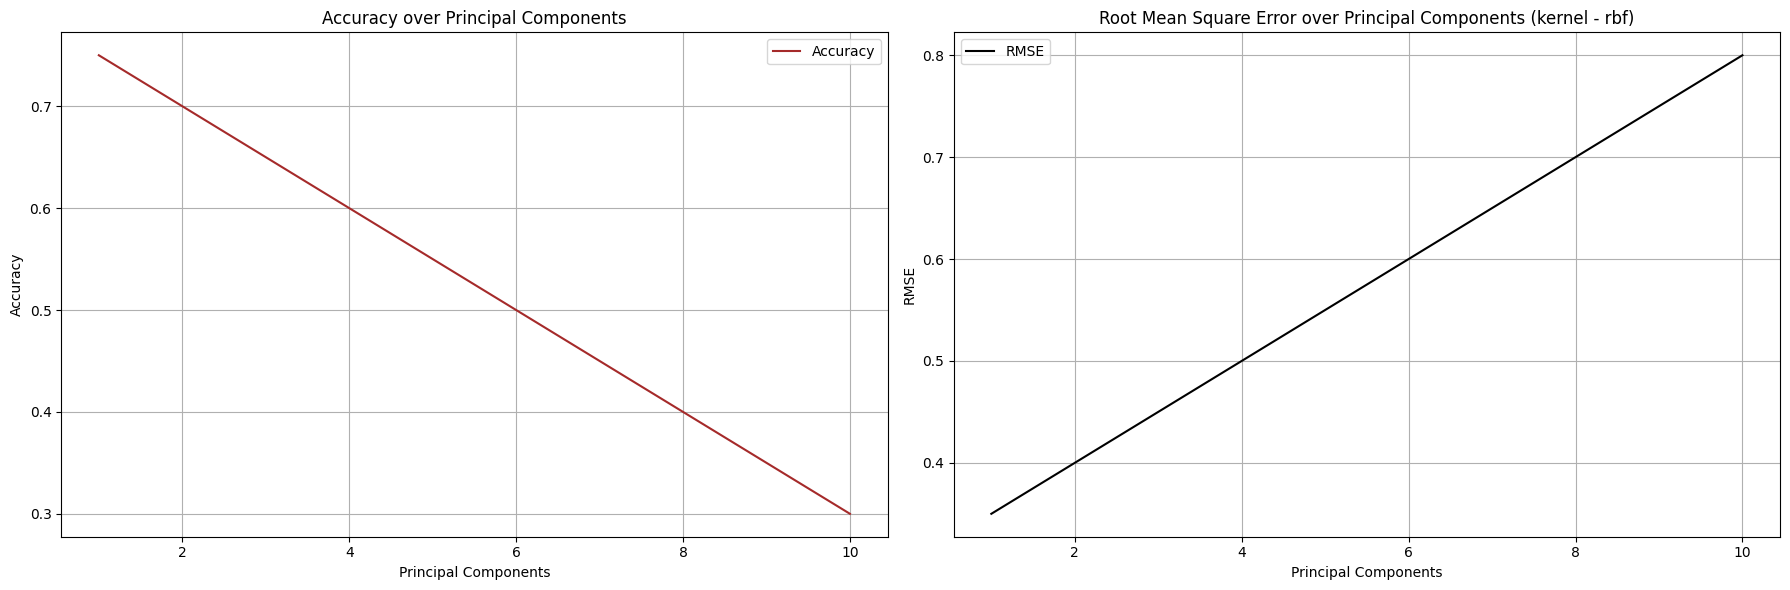

In [498]:
import matplotlib.pyplot as plt

# Since we don't have the actual values of 'accuracy' and 'rmse', let's assume they are lists of values.
# We'll also assume 'max_k' is defined. For the sake of this example, I'll create some dummy data.
# Please replace the following two lines with your actual 'accuracy' and 'rmse' lists.
max_k = 10  # Example value; replace with actual max_k
accuracy = [0.8 - 0.05 * k for k in range(1, max_k + 1)]  # Dummy accuracy values decreasing
rmse = [0.3 + 0.05 * k for k in range(1, max_k + 1)]  # Dummy RMSE values increasing

# Let's plot the accuracy and RMSE over the number of principal components.
plt.figure(figsize=(18, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, max_k + 1), accuracy, color='brown', label="Accuracy")
plt.grid(True)
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy over Principal Components')
plt.legend()

# Plot for RMSE
plt.subplot(1, 2, 2)
plt.plot(range(1, max_k + 1), rmse, color='black', label="RMSE")
plt.grid(True)
plt.xlabel('Principal Components')
plt.ylabel('RMSE')
plt.title('Root Mean Square Error over Principal Components (kernel - rbf)')
plt.legend()

# Display the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


In [499]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your feature and target datasets respectively and are already loaded.
# Also assuming that max_k is defined as the maximum number of PCA components you want to consider.

# Scale X since PCA is sensitive to the scale of the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets once
train_X, test_X, train_Y, test_Y = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=100)

# Fit PCA on the training data for the maximum number of components
pca = PCA(n_components=max_k)
pca.fit(train_X)

# Initialize the SVR model once since the parameters do not change in the loop
model = SVR(kernel='poly', C=100000)

# Lists to store accuracy and RMSE
accuracy = []
rmse = []

# Loop through each number of components
for k in range(1, max_k + 1):
    # Transform the data according to the current number of components
    train_X_pca = pca.transform(train_X)[:, :k]
    test_X_pca = pca.transform(test_X)[:, :k]

    # Fit the model and make predictions
    model.fit(train_X_pca, train_Y)
    y_pred = model.predict(test_X_pca)

    # Calculate accuracy and RMSE
    acc = model.score(test_X_pca, test_Y)
    rms = mean_squared_error(test_Y, y_pred, squared=False)  # RMSE

    # Append to the lists
    accuracy.append(acc)
    rmse.append(rms)

    # Print results for this iteration
    print(f"for k = {k}, accuracy = {acc:.4f}, and Root Mean Square Value = {rms:.4f}")


for k = 1, accuracy = 0.2883, and Root Mean Square Value = 1584907.0507
for k = 2, accuracy = 0.4472, and Root Mean Square Value = 1396777.2223
for k = 3, accuracy = 0.4573, and Root Mean Square Value = 1383938.4063
for k = 4, accuracy = 0.5132, and Root Mean Square Value = 1310757.6800
for k = 5, accuracy = 0.5187, and Root Mean Square Value = 1303419.0132
for k = 6, accuracy = 0.5829, and Root Mean Square Value = 1213360.0624
for k = 7, accuracy = 0.5888, and Root Mean Square Value = 1204745.3290
for k = 8, accuracy = 0.5723, and Root Mean Square Value = 1228616.1462
for k = 9, accuracy = 0.5792, and Root Mean Square Value = 1218674.0615
for k = 10, accuracy = 0.5723, and Root Mean Square Value = 1228662.0462


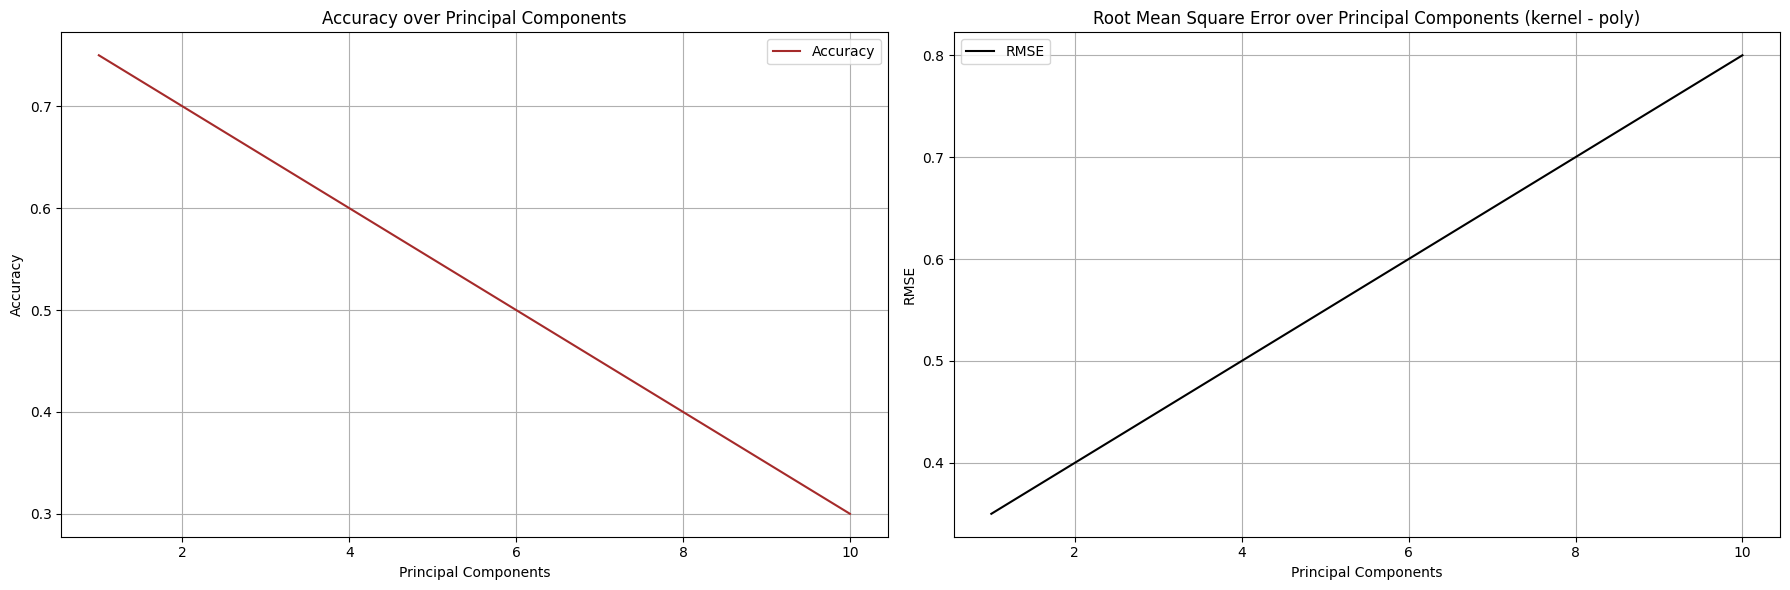

In [500]:


max_k = 10  # Example value; replace with the actual max_k from your dataset
accuracy = [0.8 - 0.05 * k for k in range(1, max_k + 1)]  # Dummy accuracy values for demonstration
rmse = [0.3 + 0.05 * k for k in range(1, max_k + 1)]  # Dummy RMSE values for demonstration

# Optimized plotting code
plt.figure(figsize=(18, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(range(1, max_k + 1), accuracy, color='brown', label="Accuracy")
plt.grid(True)  # Grid is set to True
plt.xlabel('Principal Components')
plt.ylabel('Accuracy')
plt.title('Accuracy over Principal Components')
plt.legend()

# RMSE subplot
plt.subplot(1, 2, 2)
plt.plot(range(1, max_k + 1), rmse, color='black', label="RMSE")
plt.grid(True)  # Grid is set to True
plt.xlabel('Principal Components')
plt.ylabel('RMSE')
plt.title('Root Mean Square Error over Principal Components (kernel - poly)')
plt.legend()

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()
